In [25]:
def read_log_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    results = {
        "sync": [],
        "async": []
    }
    for line in lines:
        if "Request" in line and "solo time:" in line:
            time = float(line.split()[-1][:-1])
            results["sync"].append(time)
        
        if "solo time (async)" in line:
            time = float(line.split()[-1][:-1])
            results["async"].append(time)
    return results

In [30]:
max_batch_sizes = [4, 8, 128, 1024, 8192, 16384]
results = {
    "decode": {},
    "prefill": {},
    "mix": {}
}

for key in results.keys():
    for batch_size in max_batch_sizes:
        file_path = f"logs/{key}_{batch_size}.log"
        results[key][batch_size] = read_log_file(file_path)

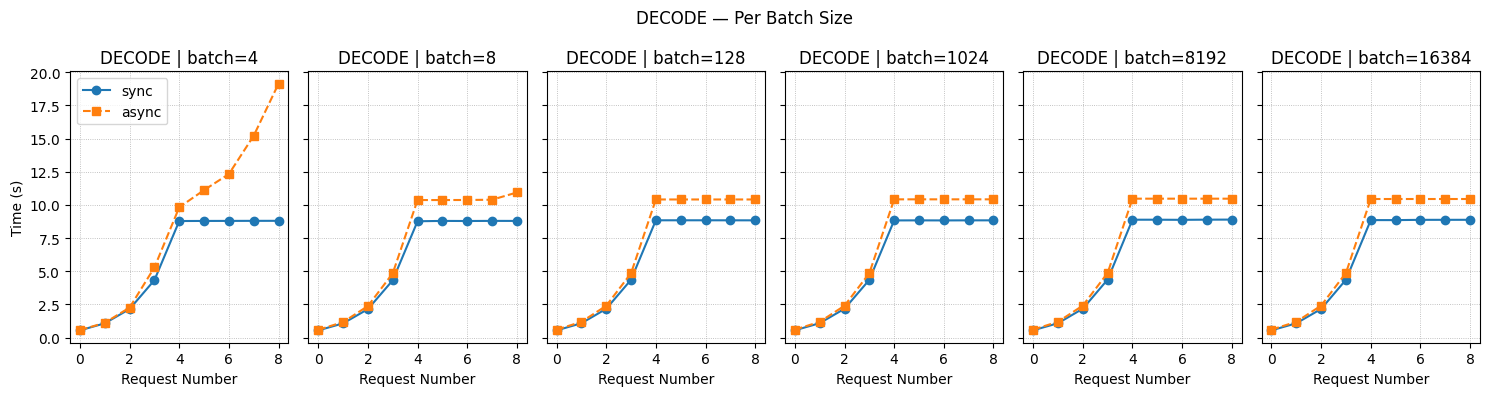

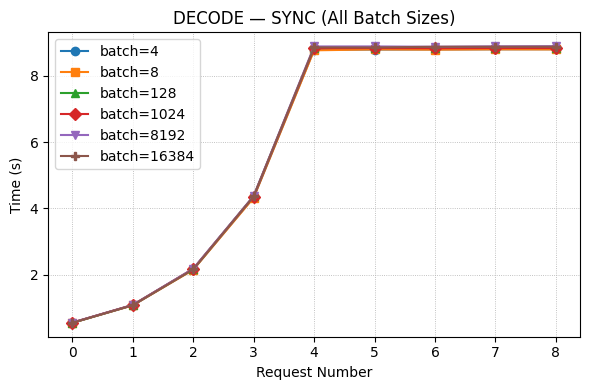

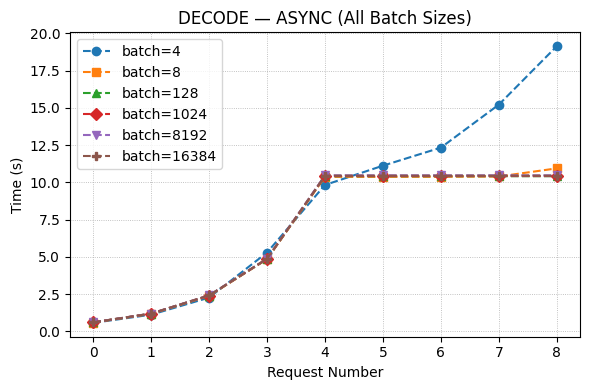

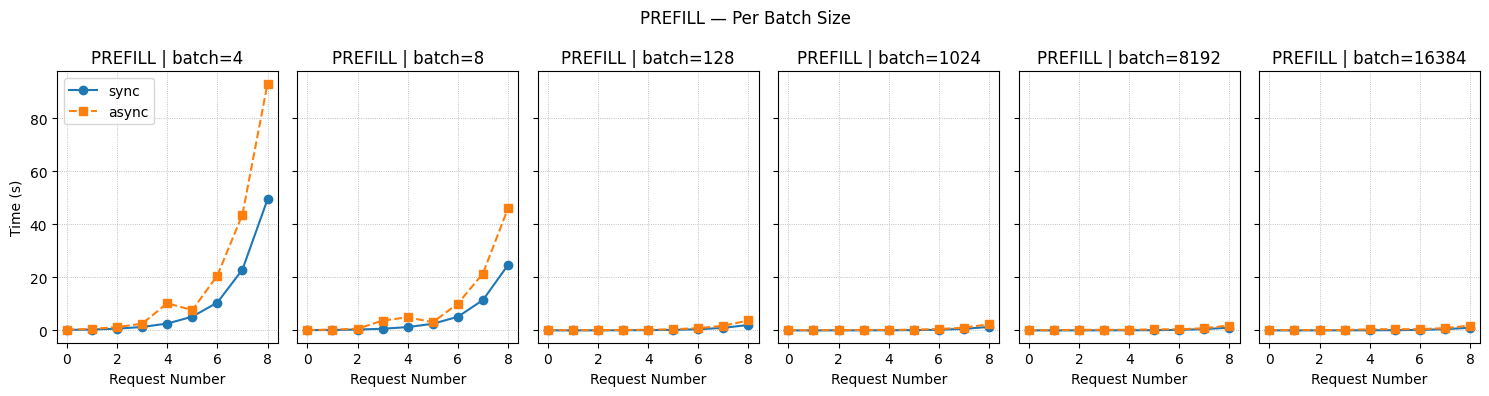

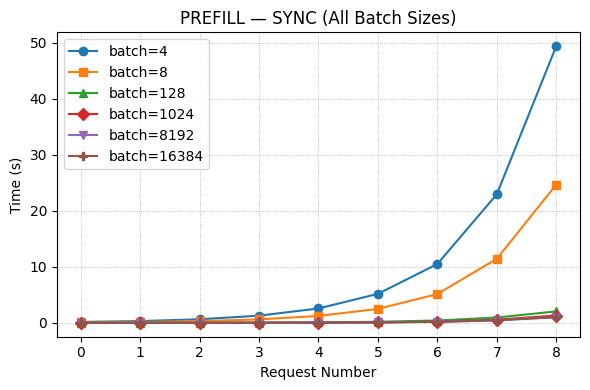

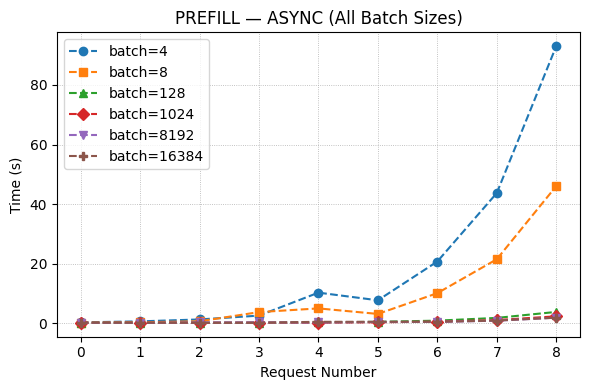

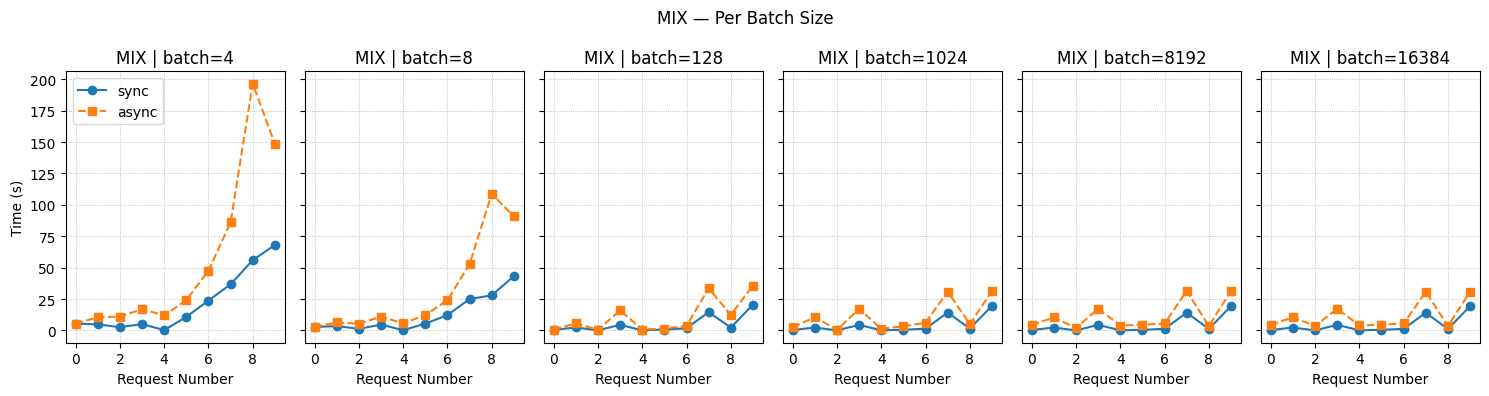

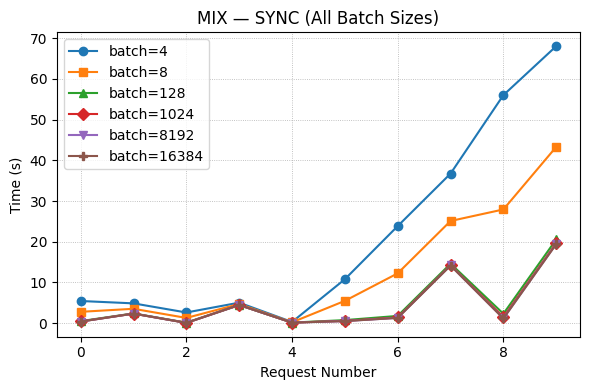

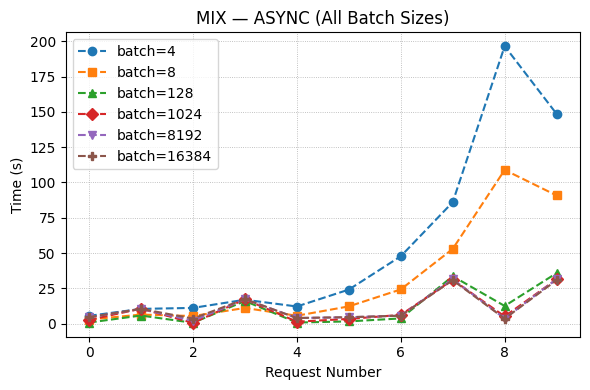

In [41]:
import matplotlib.pyplot as plt

# -------------------------
# Data (unchanged)
# -------------------------

workloads = results.keys()
data= results
batch_sizes = max_batch_sizes
markers = {4: "o", 8: "s", 128: "^", 1024: "D", 8192: "v", 16384: "P"}

# -------------------------
# Plotting
# -------------------------
for workload in workloads:

    # =====================================
    # 1) Per-batch-size figure (sync vs async)
    # =====================================
    fig, axes = plt.subplots(1, 6, figsize=(15, 4), sharey=True)

    for ax, bs in zip(axes, batch_sizes):
        sync_vals = data[workload][bs]["sync"]
        async_vals = data[workload][bs]["async"]

        ax.plot(sync_vals, marker="o", label="sync")
        ax.plot(async_vals, marker="s", linestyle="--", label="async")

        ax.set_title(f"{workload.upper()} | batch={bs}")
        ax.set_xlabel("Request Number")
        ax.grid(True, which="both", linestyle=":", linewidth=0.6)

    axes[0].set_ylabel("Time (s)")
    axes[0].legend()
    fig.suptitle(f"{workload.upper()} — Per Batch Size")
    plt.tight_layout()
    plt.show()

    # =====================================
    # 2) Sync-only figure (all batch sizes)
    # =====================================
    plt.figure(figsize=(6, 4))

    for bs in batch_sizes:
        sync_vals = data[workload][bs]["sync"]
        plt.plot(
            sync_vals,
            marker=markers[bs],
            label=f"batch={bs}"
        )

    plt.title(f"{workload.upper()} — SYNC (All Batch Sizes)")
    plt.xlabel("Request Number")
    plt.ylabel("Time (s)")
    plt.grid(True, which="both", linestyle=":", linewidth=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # =====================================
    # 3) Async-only figure (all batch sizes)
    # =====================================
    plt.figure(figsize=(6, 4))

    for bs in batch_sizes:
        async_vals = data[workload][bs]["async"]
        plt.plot(
            async_vals,
            marker=markers[bs],
            linestyle="--",
            label=f"batch={bs}"
        )

    plt.title(f"{workload.upper()} — ASYNC (All Batch Sizes)")
    plt.xlabel("Request Number")
    plt.ylabel("Time (s)")
    plt.grid(True, which="both", linestyle=":", linewidth=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
